<a href="https://colab.research.google.com/github/dongminkim0220/pytorch_tutorial/blob/master/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP BASICS

## Char RNN Classification

In [15]:
%cd /content/drive/MyDrive/'Deep Learning Introduction'/'pytorch intro'

/content/drive/MyDrive/Deep Learning Introduction/pytorch intro


In [16]:
!ls

 autograd.ipynb			 RNN_LSTM_GRU.ipynb
 Backprop-Loss-Optimizer.ipynb	'Save and Load Models.ipynb'
 data				'Softmax and Activation.ipynb'
 dataloader.ipynb		 Tensorboard.ipynb
'forward and conv.ipynb'	 Tensors.ipynb
 hymenoptera_data		'Transfer Learning.ipynb'
'pytorch official tutorial'	 utils.py
'Regression Models.ipynb'	 wine.csv
 RL_DQN.ipynb


In [17]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('data/names/*.txt'))

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

['data/names/Polish.txt', 'data/names/Italian.txt', 'data/names/Arabic.txt', 'data/names/Irish.txt', 'data/names/Czech.txt', 'data/names/Dutch.txt', 'data/names/French.txt', 'data/names/Scottish.txt', 'data/names/Japanese.txt', 'data/names/English.txt', 'data/names/Korean.txt', 'data/names/Russian.txt', 'data/names/German.txt', 'data/names/Greek.txt', 'data/names/Spanish.txt', 'data/names/Vietnamese.txt', 'data/names/Chinese.txt', 'data/names/Portuguese.txt']
Slusarski


In [18]:
category_lines

{'Arabic': ['Khoury',
  'Nahas',
  'Daher',
  'Gerges',
  'Nazari',
  'Maalouf',
  'Gerges',
  'Naifeh',
  'Guirguis',
  'Baba',
  'Sabbagh',
  'Attia',
  'Tahan',
  'Haddad',
  'Aswad',
  'Najjar',
  'Dagher',
  'Maloof',
  'Isa',
  'Asghar',
  'Nader',
  'Gaber',
  'Abboud',
  'Maalouf',
  'Zogby',
  'Srour',
  'Bahar',
  'Mustafa',
  'Hanania',
  'Daher',
  'Tuma',
  'Nahas',
  'Saliba',
  'Shamoon',
  'Handal',
  'Baba',
  'Amari',
  'Bahar',
  'Atiyeh',
  'Said',
  'Khouri',
  'Tahan',
  'Baba',
  'Mustafa',
  'Guirguis',
  'Sleiman',
  'Seif',
  'Dagher',
  'Bahar',
  'Gaber',
  'Harb',
  'Seif',
  'Asker',
  'Nader',
  'Antar',
  'Awad',
  'Srour',
  'Shadid',
  'Hajjar',
  'Hanania',
  'Kalb',
  'Shadid',
  'Bazzi',
  'Mustafa',
  'Masih',
  'Ghanem',
  'Haddad',
  'Isa',
  'Antoun',
  'Sarraf',
  'Sleiman',
  'Dagher',
  'Najjar',
  'Malouf',
  'Nahas',
  'Naser',
  'Saliba',
  'Shamon',
  'Malouf',
  'Kalb',
  'Daher',
  'Maalouf',
  'Wasem',
  'Kanaan',
  'Naifeh',
  'Boutro

In [19]:
all_categories

['Polish',
 'Italian',
 'Arabic',
 'Irish',
 'Czech',
 'Dutch',
 'French',
 'Scottish',
 'Japanese',
 'English',
 'Korean',
 'Russian',
 'German',
 'Greek',
 'Spanish',
 'Vietnamese',
 'Chinese',
 'Portuguese']

In [22]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


In [29]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.softmax(self.i2o(combined))
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [30]:
n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [31]:
input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

In [32]:
output, next_hidden

(tensor([[-2.9686, -2.9119, -2.8833, -2.8877, -2.7958, -2.8777, -2.8339, -2.9049,
          -2.8759, -2.8711, -2.9061, -2.8815, -2.8894, -2.9566, -2.8806, -3.0262,
          -2.8446, -2.8537]], grad_fn=<LogSoftmaxBackward>),
 tensor([[ 0.0573, -0.1328,  0.0187,  0.0846,  0.0669,  0.0224, -0.0512,  0.0119,
          -0.0681, -0.0117,  0.0938, -0.0359, -0.0249, -0.0265, -0.0198, -0.0151,
          -0.0489, -0.0356, -0.0348, -0.0517, -0.0139,  0.0399,  0.0557, -0.1009,
           0.0723, -0.0493, -0.0749,  0.0060, -0.0003, -0.0216,  0.0086, -0.0130,
          -0.1395, -0.0904, -0.0508, -0.0219,  0.0279, -0.0259, -0.0635, -0.0583,
          -0.0504,  0.1147, -0.0399,  0.0598, -0.0226, -0.0403, -0.0311,  0.0331,
          -0.0225, -0.0473, -0.0228,  0.0281,  0.0033,  0.0695,  0.0368, -0.0492,
          -0.0088, -0.0285, -0.0053,  0.0123,  0.0394, -0.0744, -0.0015,  0.0267,
          -0.0667,  0.0085,  0.0564,  0.0873, -0.0263, -0.0567,  0.0054, -0.1170,
           0.0096, -0.0159, -0.1099, 

In [34]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
output, next_hidden

(tensor([[-2.9686, -2.9119, -2.8833, -2.8877, -2.7958, -2.8777, -2.8339, -2.9049,
          -2.8759, -2.8711, -2.9061, -2.8815, -2.8894, -2.9566, -2.8806, -3.0262,
          -2.8446, -2.8537]], grad_fn=<LogSoftmaxBackward>),
 tensor([[ 0.0573, -0.1328,  0.0187,  0.0846,  0.0669,  0.0224, -0.0512,  0.0119,
          -0.0681, -0.0117,  0.0938, -0.0359, -0.0249, -0.0265, -0.0198, -0.0151,
          -0.0489, -0.0356, -0.0348, -0.0517, -0.0139,  0.0399,  0.0557, -0.1009,
           0.0723, -0.0493, -0.0749,  0.0060, -0.0003, -0.0216,  0.0086, -0.0130,
          -0.1395, -0.0904, -0.0508, -0.0219,  0.0279, -0.0259, -0.0635, -0.0583,
          -0.0504,  0.1147, -0.0399,  0.0598, -0.0226, -0.0403, -0.0311,  0.0331,
          -0.0225, -0.0473, -0.0228,  0.0281,  0.0033,  0.0695,  0.0368, -0.0492,
          -0.0088, -0.0285, -0.0053,  0.0123,  0.0394, -0.0744, -0.0015,  0.0267,
          -0.0667,  0.0085,  0.0564,  0.0873, -0.0263, -0.0567,  0.0054, -0.1170,
           0.0096, -0.0159, -0.1099, 

In [35]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('Czech', 4)


In [36]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = Russian / line = Eikhenvald
category = German / line = Kerner
category = Vietnamese / line = Le
category = Czech / line = Urista
category = Czech / line = Jarzembowski
category = Irish / line = Conn
category = Russian / line = Jernevsky
category = Dutch / line = Robert
category = Dutch / line = Nelissen
category = Scottish / line = Grant


In [37]:
criterion = nn.NLLLoss()

In [45]:
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()
    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    # update parameter here!
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [46]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000



# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
    

KeyboardInterrupt: ignored

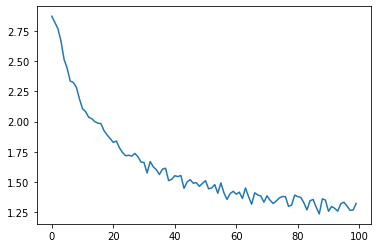

In [40]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

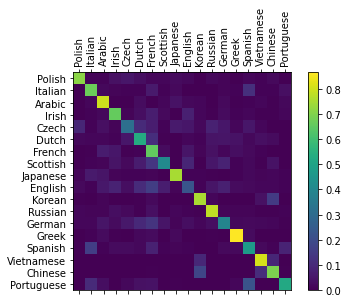

In [41]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

In [42]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-0.69) Russian
(-1.09) Czech
(-2.25) English

> Jackson
(-0.64) Scottish
(-1.40) English
(-2.16) Russian

> Satoshi
(-0.39) Japanese
(-2.56) Italian
(-2.60) Arabic


In [44]:
predict("tommy")


> tommy
(-1.22) English
(-1.70) Czech
(-2.16) Russian


## Char RNN for name generation

In [47]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'-"
n_letters = len(all_letters) + 1 # Plus EOS marker

def findFiles(path): return glob.glob(path)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

# Read a file and split into lines
def readLines(filename):
    with open(filename, encoding='utf-8') as some_file:
        return [unicodeToAscii(line.strip()) for line in some_file]

# Build the category_lines dictionary, a list of lines per category
category_lines = {}
all_categories = []
for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

if n_categories == 0:
    raise RuntimeError('Data not found. Make sure that you downloaded data '
        'from https://download.pytorch.org/tutorial/data.zip and extract it to '
        'the current directory.')

print('# categories:', n_categories, all_categories)
print(unicodeToAscii("O'Néàl"))

# categories: 18 ['Polish', 'Italian', 'Arabic', 'Irish', 'Czech', 'Dutch', 'French', 'Scottish', 'Japanese', 'English', 'Korean', 'Russian', 'German', 'Greek', 'Spanish', 'Vietnamese', 'Chinese', 'Portuguese']
O'Neal


In [48]:
import torch
import torch.nn as nn

In [126]:
class NameGeneratorNet(nn.Module):
    def __init__(self, category_size, input_size, hidden_size, output_size):
        super(NameGeneratorNet, self).__init__()
        self.category_size = category_size
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.i2o = nn.Linear(category_size + input_size + hidden_size, output_size)
        self.i2h = nn.Linear(category_size + input_size + hidden_size, hidden_size)
        self.o2o = nn.Linear(output_size + hidden_size, output_size)
        self.dropout = nn.Dropout(0.1)
        self.softmax = nn.LogSoftmax(dim = 1)

    def forward(self, category, input, hidden):
        input_combined = torch.cat((category, input, hidden), dim = 1)
        output = self.i2o(input_combined)
        hidden = self.i2h(input_combined)
        output_combined = torch.cat((output, hidden), dim = 1)
        output = self.o2o(output_combined)
        output = self.dropout(output)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [127]:
import random

# Random item from a list
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

# Get a random category and random line from that category
def randomTrainingPair():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    return category, line

In [128]:
# One-hot vector for category
def categoryTensor(category):
    li = all_categories.index(category)
    tensor = torch.zeros(1, n_categories)
    tensor[0][li] = 1
    return tensor

# One-hot matrix of first to last letters (not including EOS) for input
def inputTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li in range(len(line)):
        letter = line[li]
        tensor[li][0][all_letters.find(letter)] = 1
    return tensor

# LongTensor of second letter to end (EOS) for target
def targetTensor(line):
    letter_indexes = [all_letters.find(line[li]) for li in range(1, len(line))]
    letter_indexes.append(n_letters - 1) # EOS
    return torch.LongTensor(letter_indexes)

In [129]:
# Make category, input, and target tensors from a random category, line pair
def randomTrainingExample():
    category, line = randomTrainingPair()
    category_tensor = categoryTensor(category)
    input_line_tensor = inputTensor(line)
    target_line_tensor = targetTensor(line)
    return category_tensor, input_line_tensor, target_line_tensor

In [130]:
criterion = nn.NLLLoss()

learning_rate = 0.0005

def train(category_tensor, input_line_tensor, target_line_tensor):
    target_line_tensor.unsqueeze_(-1)
    hidden = rnn.initHidden()

    rnn.zero_grad()

    loss = 0

    for i in range(input_line_tensor.size(0)):
        output, hidden = rnn(category_tensor, input_line_tensor[i], hidden)
        l = criterion(output, target_line_tensor[i])
        loss += l

    loss.backward()

    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item() / input_line_tensor.size(0)

In [131]:
import time
import math

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [133]:
rnn = NameGeneratorNet(n_categories, n_letters, 128, n_letters)

n_iters = 100000
print_every = 5000
plot_every = 500
all_losses = []
total_loss = 0 # Reset every plot_every iters

start = time.time()

for iter in range(1, n_iters + 1):

    output, loss = train(*randomTrainingExample())
    total_loss += loss

    if iter % print_every == 0:
        print('%s (%d %d%%) %.4f' % (timeSince(start), iter, iter / n_iters * 100, loss))

    if iter % plot_every == 0:
        all_losses.append(total_loss / plot_every)
        total_loss = 0

0m 10s (5000 5%) 2.8990
0m 21s (10000 10%) 2.2865
0m 31s (15000 15%) 2.0220
0m 41s (20000 20%) 2.6456
0m 52s (25000 25%) 2.4046
1m 3s (30000 30%) 2.2235
1m 13s (35000 35%) 3.2561
1m 24s (40000 40%) 1.8122
1m 34s (45000 45%) 2.9316
1m 45s (50000 50%) 2.5934
1m 55s (55000 55%) 2.8411
2m 6s (60000 60%) 1.7548
2m 16s (65000 65%) 1.9855
2m 27s (70000 70%) 2.2493
2m 37s (75000 75%) 2.1285
2m 48s (80000 80%) 3.9190
2m 58s (85000 85%) 2.8370
3m 9s (90000 90%) 1.7231
3m 19s (95000 95%) 2.8288
3m 29s (100000 100%) 2.3498


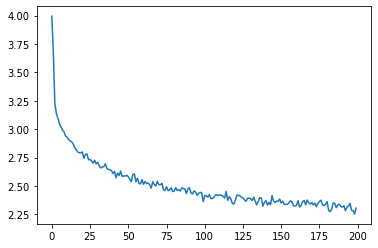

In [134]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(all_losses)

In [135]:
max_length = 20

# Sample from a category and starting letter
def sample(category, start_letter='A'):
    with torch.no_grad():  # no need to track history in sampling
        category_tensor = categoryTensor(category)
        input = inputTensor(start_letter)
        hidden = rnn.initHidden()

        output_name = start_letter

        for i in range(max_length):
            output, hidden = rnn(category_tensor, input[0], hidden)
            topv, topi = output.topk(1)
            topi = topi[0][0]
            if topi == n_letters - 1:
                break
            else:
                letter = all_letters[topi]
                output_name += letter
            input = inputTensor(letter)

        return output_name

# Get multiple samples from one category and multiple starting letters
def samples(category, start_letters='ABC'):
    for start_letter in start_letters:
        print(sample(category, start_letter))

samples('Russian', 'RUS')

samples('German', 'GER')

samples('Spanish', 'SPA')

samples('Chinese', 'CHI')

Rovanik
Uanton
Sharin
Gerrer
Eringer
Rongerr
Salle
Paran
Arran
Chan
Han
Iun
